In [1]:
import random
import math
import numpy as np
import csv
import matplotlib.pyplot as plt
import time

MUTATION_RATE = 40
MUTATION_COUNT = 2
THRESHOLD = 35000
UNIFORMCROSSOVER_RATE = 0.5

csvfile = 'TSP.csv'

def read_csv(csvf): #csv 파일 읽기, csv file read
    City = np.genfromtxt(open(csvf, "rb"),dtype=float, delimiter=",", skip_header=0)
    print(City)
    return City

cityCoordinates = read_csv(csvfile)
citySize = len(read_csv(csvfile))

class Genome():
    chromosomes = []
    fitness = 100000

    def __init__(self, numberOfchromosomes=None):
        if numberOfchromosomes is not None:
            self.chromosomes = list(range(numberOfchromosomes))
            randShuffle(self.chromosomes)


def randShuffle(listToShuffle):
    return random.shuffle(listToShuffle)

def init_population(size) :
    initial_population = []
    for i in range(size):
        newGenome = Genome()
        newGenome.chromosomes = random.sample(range(1, citySize), citySize - 1)
        newGenome.chromosomes.insert(0, 0)
        newGenome.chromosomes.append(0)
        newGenome.fitness = Evaluate(newGenome.chromosomes)
        initial_population.append(newGenome)
    return initial_population

def Evaluate(chromosomes):
    Fitness = 0
    for i in range(len(chromosomes) - 1):
        p1 = cityCoordinates[chromosomes[i]]
        p2 = cityCoordinates[chromosomes[i + 1]]
        Fitness += Euclidean_distance(p1, p2)
    Fitness = np.round(Fitness, 2)
    return Fitness

def Euclidean_distance(x, y):
    dist = np.linalg.norm(np.array(x)-np.array(y))
    return dist


def findBestGenome(population):
    allFitness = [i.fitness for i in population]
    bestFitness = min(allFitness)
    return population[allFitness.index(bestFitness)]

#선택 연산 _ Selection
'''
def roulette_wheel_selection(population):
    population_fitness = sum([chromosome.fitness for chromosome in population])
    chromosome_probabilities = [chromosome.fitness / population_fitness for chromosome in population]
    chromosome_probabilities = 1 - np.array(chromosome_probabilities)
    chromosome_probabilities /= chromosome_probabilities.sum()
    return np.random.choice(population, p=chromosome_probabilities)
'''

def TournamentSelection(population, k):
    select = [population[random.randrange(0, len(population))] for i in range(k)]
    bestGenome = findBestGenome(select)
    return bestGenome

def Reproduction(population):
    parent1 = TournamentSelection(population, 15).chromosomes
    parent2 = TournamentSelection(population, 15).chromosomes
    while parent1 == parent2:
        parent2 = TournamentSelection(population, 15).chromosomes

    return OrderCrossover(parent1, parent2)

def randRange(first,last):
    return random.randint(first,last)

#교차 연산 _ Crossover
'''
def SinglePointCrossover(parent1, parent2) :
    child = Genome(None)
    child.chromosomes = []
    point = random.randint(0, len(parent1))
    child.chromosomes =parent1[:point] +parent2[point:]
    if random.randrange(0, 100) < MUTATION_RATE:
        child.chromosomes = SwapMutation(child.chromosomes)
    child.fitness = Evaluate(child.chromosomes)
    return child
def TwoPointCrossover (parent1, parent2) :
    child = Genome(None)
    child.chromosomes = []
    point1 = random.randrange(1,len(parent1) -1)
    while True :
        point2 = random.randrange(1, len(parent1)-1)
        if point1 != point2 :
            break
    child.chromosomes = parent1[:min(point1, point2)] + parent2[min(point1,point2):max(point1, point2)] + parent1[max(point1,point2):]
    if random.randrange(0, 100) < MUTATION_RATE:
        child.chromosomes = SwapMutation(child.chromosomes)
    child.fitness = Evaluate(child.chromosomes)
    return child
def PMXCrossover (parent1, parent2) :
    child = Genome(None)
    child.chromosomes = []
    size = len(parent1)
    p1, p2 = [0] * size, [0] * size
    for i in range(size) :
        p1[parent1[i]] = i
        p2[parent1[i]] = i
    point1 = random.randint(0,size)
    point2 = random.randint(0, size - 1)
    if point2 >= point1 :
        point2 += 1
    else :
        point1, point2 = point2, point1
    for i in range(point1, point2) :
        temp1 = parent1[i]
        temp2 = parent2[i]
        parent1[i], parent1[p1[temp2]] = temp2, temp1
        parent2[i], parent2[p2[temp1]] = temp1, temp2
        p1[temp1], p1[temp2] = p1[temp2], p1[temp1]
        p2[temp1], p2[temp2] = p2[temp2], p2[temp1]
    child.chromosomes = parent1[:min(point1, point2)] + parent1[min(point1,point2):max(point1, point2)] + parent1[max(point1,point2):]
    if random.randrange(0, 100) < MUTATION_RATE:
        child.chromosomes = SwapMutation(child.chromosomes)
    child.fitness = Evaluate(child.chromosomes)
    return child
def UniformCrossover(parent1, parent2) :
    size = len(parent1)
    child = [-1] * size
    child[0], child[size - 1] = 0, 0
    for i in range(1, size - 1):
        if random.randrange(0, 100) < UNIFORMCROSSOVER_RATE:
            child[i] = parent1[i]
        else:
            child[i] = parent2[i]
    if random.randrange(0, 100) < MUTATION_RATE:
        child = SwapMutation(child)
    newGenome = Genome()
    newGenome.chromosomes = child
    newGenome.fitness = Evaluate(child)
    return newGenome
'''

def OrderCrossover(parent1, parent2):
    child = Genome(None)
    child.chromosomes = []
    firstIndex = randRange(0,len(parent1)-1)
    secondIndex = randRange(firstIndex, len(parent1)-1)
    innerSet = parent1[firstIndex:secondIndex]
    startSet = []
    endSet = []
    for _, value in enumerate([item for item in parent2 if item not in innerSet]):
        if len(startSet)<firstIndex:
            startSet.append(value)
        else:
            endSet.append(value)
    child.chromosomes = startSet + innerSet + endSet
    
    if random.randrange(0, 100) < MUTATION_RATE:
        child.chromosomes = InversionMutation(child.chromosomes)
    
    child.fitness = Evaluate(child.chromosomes)
    return child

#변이 연산 _ Mutation
'''
def SwapMutation(chromo):
    for x in range(MUTATION_COUNT):
        p1, p2 = [random.randrange(1, len(chromo) - 1) for i in range(2)]
        while p1 == p2:
            p2 = random.randrange(1, len(chromo) - 1)
        log = chromo[p1]
        chromo[p1] = chromo[p2]
        chromo[p2] = log
    return chromo
def ScrambleMutation(chromo) :
    for x in range(MUTATION_COUNT):
        p1, p2 = [random.randrange(1, len(chromo) - 1) for i in range(2)]
        while p1 == p2 or p1 > p2:
            p1 = random.randint(0, len(chromo) - 1)
            p2 = random.randint(0, len(chromo) - 1)
        log = chromo[p1:p2]
        random.shuffle(log)
        chromo = chromo[:p1] + log +chromo[p2:]
    return chromo
'''
def InversionMutation(chromo) :
    for x in range(MUTATION_COUNT):
        p1, p2 = [random.randrange(1, len(chromo) - 1) for i in range(2)]
        while p1 == p2 or p1 > p2:
            p1 = random.randint(0, len(chromo) - 1)
            p2 = random.randint(0, len(chromo) - 1)
        log = chromo[p1:p2]
        log = log[::-1]
        chromo = chromo[:p1] + log +chromo[p2:]
    return chromo

#시각화 _ Visualization
def fitness_plot(generation, allBestFitness):
    plt.plot(range(0, generation), allBestFitness, c='blue')
    plt.xlabel('Generations')
    plt.ylabel('Best Fitness')
    plt.title('Fitness Function')
    plt.show()
    
def city_visualize(bestGenome, city):
    start = None
    for x, y in city:
        if start is None: #시작지점이면 표시
            start = city[0]
            plt.scatter(start[0], start[1], c="green", marker=">")
            plt.annotate("Start", (x + 2, y - 2), color='red')
        else: #시작지점 아니면
            plt.scatter(x, y, marker='.', s=10, c="black")

    #edge 표현을 위한 x, y 범위
    x_edge = [city[i][0] for i in bestGenome.chromosomes]
    y_edge = [city[i][1] for i in bestGenome.chromosomes]

    plt.plot(x_edge, y_edge, color="blue", linewidth=0.07, linestyle="-")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('City Edges')
    plt.show()

def GeneticAlgorithm(populationSize, Generation_Count):
    allBestFitness = []
    population = init_population(populationSize)
    generation = 0
    TotalBestFitness = 100000
    TotalBestPath = []
    
    start = time.time()
    
    while generation < Generation_Count:
        generation += 1

        for i in range(populationSize):
            population.append(Reproduction(population))
        
        for genom in population:
            if genom.fitness > THRESHOLD:
                population.remove(genom)
        
        averageFitness = round(np.sum([genom.fitness for genom in population]) / len(population), 2)
        bestGenome = findBestGenome(population)
        if bestGenome.fitness < TotalBestFitness:
            TotalBestFitness = bestGenome.fitness
            TotalBestPath = bestGenome.chromosomes
        print("\n" * 5)
        print("Generation: {0}\nPopulation Size: {1}\t Average Fitness: {2}\nBest Fitness: {3}"
              .format(generation, len(population), averageFitness,
                      bestGenome.fitness))

        allBestFitness.append(bestGenome.fitness)
    
    print("\nTotal Best Fitness : ",TotalBestFitness)
    
    end = time.time()
    
    print("Total time : ", end-start) # 소요 시간 표기, Working Time
    
    #시각화
    fitness_plot(generation, allBestFitness)
    city_visualize(bestGenome, cityCoordinates)

    #csv 파일 경로 저장
    f = open('temp.csv', 'w', newline='')
    wr = csv.writer(f)
    for i in range(0, citySize):
        wr.writerow([TotalBestPath[i]])
    f.close()

if __name__ == "__main__":
    GeneticAlgorithm(populationSize=15, Generation_Count=5000) #Population size, Generation Count 입력

[[1.74470756e+01]
 [8.58817969e+01]
 [6.80997653e+01]
 [8.90386801e+01]
 [2.44331077e+01]
 [9.01064263e+01]
 [6.92165577e+01]
 [8.05519613e+01]
 [1.40561065e+01]
 [5.56842676e+01]
 [8.58435975e+01]
 [8.94808437e+00]
 [9.36569679e+01]
 [9.20911628e+01]
 [9.06311422e+01]
 [3.72016151e+01]
 [4.75231875e+01]
 [8.45695331e-01]
 [5.07168255e+01]
 [8.72236670e+01]
 [6.94943695e+01]
 [4.75005016e+01]
 [7.40153858e+01]
 [2.99504946e+01]
 [6.89934675e+01]
 [5.42122135e+01]
 [7.45282811e+01]
 [4.44662509e+01]
 [5.89306628e+00]
 [6.37187739e+01]
 [6.96125038e+01]
 [2.85216678e+01]
 [2.74047979e+01]
 [6.26224767e+01]
 [4.24951779e+01]
 [3.71280196e+01]
 [4.80767603e+01]
 [1.82929823e+01]
 [2.00992759e+01]
 [1.08961094e+01]
 [4.05867961e+01]
 [3.47406228e+01]
 [6.53181123e+01]
 [2.86646551e+01]
 [7.36568445e+01]
 [7.53950225e+01]
 [3.63053581e+01]
 [2.14528769e+01]
 [6.45437104e+01]
 [9.81794856e+01]
 [5.50137274e+01]
 [8.78256928e+01]
 [1.68786914e+01]
 [5.88064269e+01]
 [5.65921137e+01]
 [8.150207

ValueError: empty range for randrange() (0, 0, 0)

In [3]:
import numpy as np
from time import time
from itertools import product
from collections import deque
from datetime import datetime
import math
import json
import solveSections


def open_coordinates(TSP_file):
    XY = []
    with open(TSP_file, 'rt') as f:
        for row in f:
            XY.append(list(map(float, row.strip().split(','))))
    return XY


def open_course(course_file, is_json):
    course = []
    with open(course_file, 'rt') as f:
        if not is_json:
            for row in f:
                course.append(list(map(int, row.replace(',', ' ').strip().split(' '))))
        else:
            course = json.loads(f.readline().strip())
    return course


def init(TSP_file='TSP.csv', course_file='TSP_03.csv', is_json=False):
    XY = open_coordinates(TSP_file)
    courses = open_course(course_file, is_json)

    return XY, courses


def make_edge(course):
    if len(course) < 1:
        return []

    edges = []
    before_node = course[-1]

    for node in course:
        edges.append((before_node, node))
        before_node = node

    return edges


def make_course(edges):
    next_course = {}
    course = [edges[0][1]]

    for start, end in edges:
        next_course[start] = end

    for _ in range(len(next_course) - 1):
        course.append(next_course[course[-1]])

    return course


DP={}
def euclidean_distance(x, y):
    key = (*x, *y)
    if key not in DP:
        DP[key] = np.linalg.norm(np.array(x) - np.array(y))

    return DP[key]

def calculate_distance(object, XY):
    if not object:
        return 0

    edges = []
    if type(object[0]) == int:
        edges = make_edge(object)
    else:
        edges = object

    distance = 0.0
    for start, end in edges:
        distance += euclidean_distance(XY[start], XY[end])
    return distance


def merge_two_sector(edges1, edges2, XY):
    edges1 = edges1[:]
    edges2 = edges2[:]
    new_edges = []

    # 한쪽 구역이 비어 있는 경우
    if len(edges1) == 0 or len(edges2) == 0:
        new_edges = edges1 + edges2
    else:
        base_distance = calculate_distance(edges1, XY) + calculate_distance(edges2, XY)
        best_distance = float('inf')
        best_combination = None

        for edge1, edge2 in product(edges1, edges2):
            distance = base_distance \
                       - euclidean_distance(XY[edge1[0]], XY[edge1[1]]) \
                       - euclidean_distance(XY[edge2[0]], XY[edge2[1]])

            not_cross_distance = distance \
                                 + euclidean_distance(XY[edge1[0]], XY[edge2[0]]) \
                                 + euclidean_distance(XY[edge1[1]], XY[edge2[1]])
            cross_distance = distance \
                             + euclidean_distance(XY[edge1[0]], XY[edge2[1]]) \
                             + euclidean_distance(XY[edge1[1]], XY[edge2[0]])

            if not_cross_distance < best_distance:
                best_distance = not_cross_distance
                best_combination = (edge1, edge2, False)
            if cross_distance < best_distance:
                best_distance = cross_distance
                best_combination = (edge1, edge2, True)

        edge1, edge2, cross = best_combination

        edges1.remove(edge1)
        edges2.remove(edge2)

        new_edges = edges1
        if cross:
            new_edges += edges2
            new_edges.append((edge1[0], edge2[1]))
            new_edges.append((edge2[0], edge1[1]))
        else:
            new_edges += list(map(lambda x: tuple(reversed(x)), edges2))
            new_edges.append((edge1[0], edge2[0]))
            new_edges.append((edge2[1], edge1[1]))

    return new_edges


def merge(edges, XY, verbose=1):
    if verbose:
        start = time()
        print(datetime.now())

    while len(edges) != 1:
        new_edges = []
        for i in range(len(edges) // 2):
            new_edges.append(merge_two_sector(edges[i * 2], edges[i * 2 + 1], XY))
        if len(edges) % 2 == 1:
            new_edges.append(edges[-1])
        edges = new_edges

        if verbose:
            print(f'\r#{len(edges)}', end='')

    if verbose:
        print('\rFinish %ds' % (time() - start))
        print(datetime.now())
    return edges[0]


def find_neighbors(idx, N):
    neighbors = []

    row = idx // N
    col = idx % N
    directions = [(-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1)]

    for drow, dcol in directions:
        nrow = row + drow
        ncol = col + dcol
        if 0 <= nrow < N and 0 <= ncol < N:
            neighbors.append(nrow * N + ncol)
    return neighbors


def merge_greedy(edges, start, XY):
    N = int(math.sqrt(len(edges)))

    idx = start
    edge = edges[start]
    visited = {start: True}
    neighbors = {}

    for _ in range(N ** 2 - 1):
        for neighbor in find_neighbors(idx, N):
            if neighbor not in visited:
                neighbors[neighbor] = True

        best_distance = float('inf')
        best_idx = None
        best_edge = None

        for neighbor in neighbors.keys():
            new_edge = merge_two_sector(edge, edges[neighbor], XY)
            distance = calculate_distance(new_edge, XY)

            if distance < best_distance:
                best_distance = distance
                best_idx = neighbor
                best_edge = new_edge

        idx = best_idx
        edge = best_edge
        visited[idx] = True
        del neighbors[idx]

    return edge


def merge_with_tree(edges, XY, verbose=1):
    if verbose:
        start = time()
        print(datetime.now())

    best_distance=float('inf')
    best_edge = None

    for i in range(64):
        edge=merge_greedy(edges, i, XY)
        distance = calculate_distance(edge, XY)
        print(i, distance)
        if distance < best_distance:
            best_distance=distance
            best_edge=edge

    if verbose:
        print('\rFinish %ds' % (time() - start))
        print(datetime.now())

    return best_edge


def optimize_4sector(point, edges, XY):
    best_distance = float('inf')
    best_path = None
    best_edge = None
    for starting in range(4):

        visited = [False] * 4
        visited[starting] = True
        edge = edges[point[starting]]
        Q = deque([(edge, visited, [point[starting]])])

        while Q:
            edge, visited, path = Q.popleft()
            finished = True
            for i in range(4):
                if not visited[i]:
                    finished = False
                    new_visited = visited[:]
                    new_visited[i] = True
                    new_path = path[:]
                    new_path.append(point[i])

                    new_edge = merge_two_sector(edge, edges[point[i]], XY)
                    Q.append((new_edge, new_visited, new_path))
            if finished:
                distance = calculate_distance(edge, XY)
                if distance < best_distance:
                    best_distance = distance
                    best_path = path
                    best_edge = edge

            # local_best_distance = float('inf')
            # local_best_idx = 0
            # local_best_edge = None
            #
            # for i in range(4):
            #     if not visited[i]:
            #         new_edge = merge_two_sector(edge, edges[point[i]], XY)
            #         distance = calculate_distance(new_edge, XY)
            #         if distance < local_best_distance:
            #             local_best_distance = distance
            #             local_best_idx = i
            #             local_best_edge = new_edge
            #
            # if local_best_edge:
            #     new_visited = visited[:]
            #     new_visited[local_best_idx] = True
            #     new_path = path[:]
            #     new_path.append(point[local_best_idx])
            #     Q.append((local_best_edge, new_visited, new_path))
            # else:
            #     distance = calculate_distance(edge, XY)
            #     if distance < best_distance:
            #         best_distance = distance
            #         best_path = path
            #         best_edge = edge

    return best_edge, best_path, best_distance


def merge_4way(edges, XY, verbose=1):
    if verbose:
        start = time()
        print(datetime.now())

    while len(edges) != 1:
        N = int(math.sqrt(len(edges)))
        new_edges = []

        for i in range((N // 2) ** 2):
            base = (i // (N // 2)) * N
            point = [i * 2 + base, i * 2 + 1 + base,
                     (i + N // 2) * 2 + base, (i + N // 2) * 2 + 1 + base]
            print(point)
            new_edge, _, _ = optimize_4sector(point, edges, XY)
            new_edges.append(new_edge)
        edges = new_edges

        if verbose:
            print(f'\r#{len(edges)}', end='')

    if verbose:
        print('\rFinish %ds' % (time() - start))
        print(datetime.now())
    return edges[0]


if __name__ == '__main__':
    print(solveSections.solve(8))
    '''
    XY, courses = init('TSP.csv', 'TSP_sol_16x16.csv', is_json=True)
    edges = list(map(make_edge, courses))
    # edge = merge_with_tree(edges, XY)
    # distance = calculate_distance(edge, XY)
    # print('Total Distance: %f' % distance)
    # with open(f'merged_{distance}.txt', 'wt') as f:
    #     f.write(json.dumps(make_course(edge)) + '\n')
    edge = merge(edges, XY)
    distance = calculate_distance(edge, XY)
    print('Total Distance: %f' % distance)
    with open(f'merged_{distance}.txt', 'wt') as f:
        f.write(json.dumps(make_course(edge)) + '\n')
    # edge = merge_4way(edges, XY)
    # distance = calculate_distance(edge, XY)
    # print('Total Distance: %f' % distance)
    # with open(f'merged_{distance}.txt', 'wt') as f:
    #     f.write(json.dumps(make_course(edge)) + '\n')
    print(len(make_course(edge)))
    import cv2
    image = np.full((1100, 1100, 3), 255, np.uint8)
    convert_xy = lambda x, y: (int(x * 10) + 50, int(y * 10) + 50)
    for x, y in XY:
        cv2.circle(image, center=convert_xy(x, y), radius=3, color=(0, 0, 255), thickness=-1, lineType=cv2.LINE_AA)
    for start, end in edge:
        cv2.line(
            image,
            pt1=convert_xy(XY[start][0], XY[start][1]),
            pt2=convert_xy(XY[end][0], XY[end][1]),
            color=(255, 0, 0),
            thickness=1,
            lineType=cv2.LINE_AA
        )
    cv2.imshow('image', image)
    cv2.waitKey(0)
'''

ModuleNotFoundError: No module named 'solveSections'

start 0 sector
0세대, 거리: 179.4512143544764
변이 확률: 0.100000
1세대, 거리: 179.4512143544764
변이 확률: 0.100000
2세대, 거리: 179.4512143544764
변이 확률: 0.102000
3세대, 거리: 177.12610246143456
변이 확률: 0.104000
4세대, 거리: 177.12610246143456
변이 확률: 0.102000
5세대, 거리: 168.74676467776885
변이 확률: 0.104000
6세대, 거리: 165.13575089085413
변이 확률: 0.102000
7세대, 거리: 164.60292896169747
변이 확률: 0.100000
8세대, 거리: 162.66082138941118
변이 확률: 0.100000
9세대, 거리: 158.40753098245216
변이 확률: 0.100000
10세대, 거리: 156.0949502007162
변이 확률: 0.100000
11세대, 거리: 150.79763917493872
변이 확률: 0.100000
12세대, 거리: 147.70037322127166
변이 확률: 0.100000
13세대, 거리: 147.70037322127166
변이 확률: 0.100000
14세대, 거리: 143.56718439087254
변이 확률: 0.102000
15세대, 거리: 143.56718439087254
변이 확률: 0.100000
16세대, 거리: 143.56718439087254
변이 확률: 0.102000
17세대, 거리: 141.15978183712133
변이 확률: 0.104000
18세대, 거리: 139.39744014355344
변이 확률: 0.102000
19세대, 거리: 139.39744014355344
변이 확률: 0.100000
20세대, 거리: 137.7131220396613
변이 확률: 0.102000
21세대, 거리: 137.7131220396613
변이 확률: 0.100000
22세대, 거리: 1

KeyboardInterrupt: 

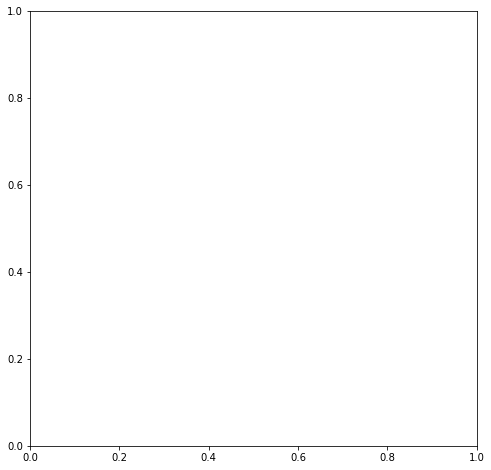

In [8]:

import math, random
import numpy as np
import pandas as pd
import time
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation

class Sector:
    def __init__(self, division_size = 8):
        self.division_size = division_size
        self.sectors= [[] for _ in range(self.division_size * self.division_size)]

    def getBoundary(self, x, y, width=100):
        boundary = [0]
        for i in range(self.division_size) :
            boundary.append(boundary[-1] + width / self.division_size)
        xboundary = 0
        yboundary = 0
        for i in range(1, self.division_size + 1):
            if boundary[i - 1] <= x < boundary[i]:
                xboundary = i - 1
            if boundary[i - 1] <= y < boundary[i]:
                yboundary = i - 1
        return xboundary, yboundary

    def divide(self, coursemanager):
        for city in coursemanager.destinationCities:
            x = city.x
            y = city.y
            index = city.index
            xidx, yidx = self.getBoundary(x, y)
            self.sectors[yidx * self.division_size + xidx].append(index)

    def getSectors(self):
        return self.sectors

class City:
    def __init__(self, x, y, index):
        self.x = x
        self.y = y
        self.index = index
   
    def getX(self):
        return self.x

    def getY(self):
        return self.y

    def distanceTo(self, city):
        xDistance = abs(self.getX() - city.getX())
        yDistance = abs(self.getY() - city.getY())
        distance = math.sqrt( (xDistance*xDistance) + (yDistance*yDistance) )
        return distance

    def __repr__(self):
        return str(self.index)


class Manager:
    destinationCities = []

    def addCity(self, city):
        self.destinationCities.append(city)

    def getCity(self, index):
        return self.destinationCities[index]

    def numberOfCities(self):
        return len(self.destinationCities)
        
    def loadData(self, file_path, delimiter):
        i=0
        data = np.loadtxt(file_path, delimiter=delimiter)
        for line in data:
            self.addCity(City(x = line[0], y = line[1], index = i))
            i += 1
    

class Course:
    def __init__(self, course=None):
        self.fitness = 0.0
        self.distance = 0
        if course is None:
            self.course = []
        else:
            self.course = course

    def __len__(self):
        return len(self.course)

    def __getitem__(self, index):
        return self.course[index]

    def __setitem__(self, key, value):
        self.course[key] = value

    def __repr__(self):
        geneString = 'Start -> '
        for i in range(0, self.courseSize()):
            geneString += str(self.getCity(self.course[i])) + ' -> '
        geneString += str(self.getCity(self.course[0])) + ' -> '
        geneString += 'End'
        return geneString

    def getCity(self, index):
        return coursemanager.destinationCities[index]

    def setCity(self, index, cityIndex):
        self.course[index] = cityIndex
        self.fitness = 0.0
        self.distance = 0

    def extend(self, course):
        self.course.extend(course)

    def getFitness(self):
        if self.fitness == 0:
            self.fitness = 1/float(self.getDistance())
        return self.fitness

    def getDistance(self):
        if self.distance == 0:
            courseDistance = 0
            lastCity = self.getCity(0)
            for index in self.course:
                courseDistance += self.getCity(index).distanceTo(lastCity)
                lastCity = self.getCity(index)
            courseDistance += lastCity.distanceTo(self.getCity(0))
            self.distance = courseDistance
        return self.distance

    def courseExchange(self, index1, index2):
        temp = self.course[index1]
        self.course[index1] = self.course[index2]
        self.course[index2] = temp

    def courseSize(self):
        return len(self.course)

    def containsCity(self, city):
        return city in self.course

    def getIndex(self, index):
        return self.course[index]
    
    def shuffle(self):
        if self.courseSize() == 0:
            idx = random.sample(list(range(coursemanager.numberOfCities())), coursemanager.numberOfCities()) 
        else : 
            idx = random.sample(self.course, self.courseSize())
        self.course = idx

class Population:
    def __init__(self, populationSize, initialise, course=None):
        self.courses = []
        if initialise:
            newcourse = Course(course)
            newcourse.shuffle()
            self.courses.append(newcourse)
            for idx in range(populationSize-1):
                newcourse = Course(course)
                newcourse.shuffle()
                self.courses.append(newcourse)
    def __setitem__(self, key, value):
        self.courses[key] = value

    def __getitem__(self, index):
        return self.courses[index]

    def savecourse(self, index, course):
        self.courses[index] = course

    def extentioncourse(self, pop):
        self.courses.extend(pop.courses)

    def pushCourse(self, course):
        self.courses.append(course)

    def getCourse(self, index):
        return self.courses[index]

    def getFittest(self):
        self.sortByFit()
        return self.courses[0]

    def populationSize(self):
        return len(self.courses)

    def sortByFit(self):
        self.courses = sorted(self.courses, key = lambda x : (x.getFitness()), reverse=True)

class GA:
    def __init__(self, mutationRate=0.1):
        self.mutationRate = mutationRate

    def evolvePopulation(self, pop):
        newPopulation = Population(populationSize = pop.populationSize(), initialise=False)

        for i in range(pop.populationSize()-1):
            parent1 = pop.courses[i]
            parent2 = pop.courses[i+1]
            child = self.crossover(parent1, parent2)
            newPopulation.pushCourse(child)
        
        for i in range(int(pop.populationSize()/2)):
            parent1 = pop.courses[i]
            parent2 = pop.courses[-i]
            child = self.crossover(parent1, parent2)
            newPopulation.pushCourse(child)

        for i in range(int(pop.populationSize()/10)):
            newPopulation.pushCourse(pop[i])

        newPopulation.sortByFit()
        for i in range(1, newPopulation.populationSize()):
            self.mutate(newPopulation[i])

        newPopulation = self.selection(newPopulation)
        return newPopulation

    def makeTable(self, parent1, parent2):
        edge_table = {}
        for idx in range(parent1.courseSize()):
            neighbor = []
            key = parent1[idx]
            if idx == parent1.courseSize()-1:
                neighbor.append(parent1[0])
            else:
                neighbor.append(parent1[idx+1])

            if idx == 0:
                neighbor.append(parent1[-1])
            else:
                neighbor.append(parent1[idx-1])
            if key in edge_table:
                edge_table[key] += neighbor
            else :
                edge_table[key] = neighbor

            neighbor = []
            key = parent2[idx]

            if idx == parent1.courseSize()-1:
                neighbor.append(parent2[0])
            else:
                neighbor.append(parent2[idx+1])
                
            if idx == 0:
                neighbor.append(parent2[-1])
            else:
                neighbor.append(parent2[idx-1])
            if key in edge_table:
                edge_table[key] += neighbor
            else :
                edge_table[key] = neighbor
                
        return edge_table

    def crossover(self, parent1, parent2):
        child = []
        possible_set = set(parent1.course)
        neighbor_table = self.makeTable(parent1, parent2)
        node = parent1[0]
        possible_set.remove(node)
        child.append(node)
        for idx in range(parent1.courseSize()-1):
            last = child[-1]
            least = 5
            for item in neighbor_table[last]:
                cnt = 0
                if item in child:
                    continue
                for i in neighbor_table[item]:
                    if i in child:
                        continue
                    cnt+=1
                if cnt < least:
                    node = item
                    least = cnt
            if node in child:
                city = coursemanager.getCity(node)
                least_d = 10000.0
                for idx in list(possible_set):
                    if idx == node:
                        continue    
                    dist = city.distanceTo(coursemanager.getCity(idx))
                    if dist < least_d:
                        node = idx
            child.append(node)
            possible_set.remove(node)

        return Course(child)
   
    def mutate(self, course):
        if random.random() < self.mutationRate:
            course
            numberChange = int(course.courseSize()*self.mutationRate)
            if numberChange > course.courseSize(): numberChange = course.courseSize()
            last = 0
            least = course.getDistance()
            edgeList = list()
            for now in range(1, course.courseSize()):
                last_city = course.getCity(now-1)
                now_city = course.getCity(now)
                dist = last_city.distanceTo(now_city)
                edgeList.append([last_city.index, now_city.index, dist])
            edgeList = sorted(edgeList, key = lambda x : x[2], reverse=True)
            for edge in edgeList[numberChange:]:
                course.courseExchange(edge[0], edge[1])

    def selection(self, pop):
        pop.sortByFit()
        del pop.courses[population_size:]
        return pop

    def setRate(self, rate):
        self.mutationRate = rate
    
    def upRate(self, rate = 0.002):
        self.mutationRate += rate
    
    def downRate(self, rate = 0.002):
        self.mutationRate -= rate

class Graph:
    def __init__(self):
        self.G = nx.Graph()
        self.G.add_nodes_from(list(range(coursemanager.numberOfCities())))
        self.pos = {}
        for city in coursemanager.destinationCities:
            self.pos[city.index] = [city.x, city.y]

    def draw(self, course, gene, dist):
        ax.clear()
        edges = list(self.G.edges)
        self.G.remove_edges_from(edges)
        for i in range(course.courseSize()-1):
            fr = course.getIndex(i)
            to = course.getIndex(i+1)
            self.G.add_edge(fr, to)
        self.G.add_edge(course.getIndex(course.courseSize()-1), course.getIndex(0))
        nx.draw_networkx_nodes(self.G, pos=self.pos, node_size=10)
        nx.draw_networkx_edges(self.G, pos=self.pos, ax=ax)

        ax.set_title(str(gene)+"'s G, distance: %f" %dist, fontweight="bold")
        ax.set_xticks([])
        ax.set_yticks([])
        fig.show()
        plt.pause(0.01)
    

def solve(division_size = 8):
    sector_size = division_size*division_size
    sector = Sector(division_size=division_size)
    sector.divide(coursemanager)
    fittests = [None]*sector_size
    mergedList = []
    ga = GA()
    courses = sector.getSectors()
    for idx in range(len(courses)) :
        print('start %d sector'%idx)
        pop = Population(populationSize=population_size, initialise=True, course = courses[idx])
        last=pop.getFittest()
        for i in range(int(n_generations*(len(courses[idx])/int(coursemanager.numberOfCities()/sector_size)))):
            pop = ga.evolvePopulation(pop)
            fittests[idx] = pop.getFittest()
            if last.getFitness() == fittests[idx].getFitness(): 
                ga.upRate()
            else : 
                if ga.mutationRate > 0.3:
                    ga.setRate(0.3)
                elif ga.mutationRate > 0.1:
                    ga.downRate()
            last = fittests[idx]
            if ga.mutationRate > 0.5 :
                break
        mergedList.append(fittests[idx].course)
        ga.setRate(0.1)
        del pop

    df = pd.DataFrame(mergedList)
    df.to_csv('TSP_sol.csv', index=False, header=None)
    return mergedList

#test code
def main(division_size = 8):
    plt.ion()
    grp = Graph()
    sector_size = division_size*division_size
    sector = Sector(division_size=division_size)
    sector.divide(coursemanager)
    fittests = [None]*sector_size
    merged = Course()
    mergedList = []
    dist = []
    ga = GA()
    courses = sector.getSectors()
    for idx in range(len(courses)) :
        pop = Population(populationSize=population_size, initialise=True, course = courses[idx])
        last=pop.getFittest()
        print('start %d sector'%idx)
        for i in range(int(n_generations*(len(courses[idx])/int(coursemanager.numberOfCities()/sector_size)))):
            pop = ga.evolvePopulation(pop)
            fittests[idx] = pop.getFittest()
            print('%d세대, 거리: %s'%(i,fittests[idx].getDistance()))
            print('변이 확률: %f'%ga.mutationRate)
            if last.getFitness() == fittests[idx].getFitness(): 
                ga.upRate()
            else : 
                if ga.mutationRate > 0.3:
                    ga.setRate(0.3)
                elif ga.mutationRate > 0.1:
                    ga.downRate()
            last = fittests[idx]
            if ga.mutationRate > 0.5 :
                print('%dG' %i)
                break
        grp.draw(fittests[idx], idx, fittests[idx].getDistance())
        dist.append(fittests[idx].getDistance())
        merged.extend(fittests[idx])
        mergedList.append(fittests[idx].course)
        ga.setRate(0.1)
        del pop

    grp.draw(merged, 0, sum(dist))
    plt.savefig('save_TSP.png', dpi=400)
    print(mergedList)
    df = pd.DataFrame(mergedList)
    df.to_csv('TSP_sol.csv', index=False, header=None)
    print("Finished")
   
global coursemanager
coursemanager = Manager()
coursemanager.loadData(file_path='./TSP.csv', delimiter=',')
global ax, fig
fig, ax = plt.subplots(figsize=(8, 8))

population_size = 500
n_generations = 100

#test code
if __name__ == '__main__':
    main(8)

In [11]:
import numpy as np
from time import time
from itertools import product
from collections import deque
from datetime import datetime
import math
import json


def open_coordinates(TSP_file):
    XY = []
    with open(TSP_file, 'rt') as f:
        for row in f:
            XY.append(list(map(float, row.strip().split(','))))
    return XY


def open_course(course_file, is_json):
    course = []
    with open(course_file, 'rt') as f:
        if not is_json:
            for row in f:
                course.append(list(map(int, row.replace(',', ' ').strip().split(' '))))
        else:
            course = json.loads(f.readline().strip())
    return course


def init(TSP_file='TSP.csv', course_file='TSP_03.csv', is_json=False):
    XY = open_coordinates(TSP_file)
    courses = open_course(course_file, is_json)

    return XY, courses


def make_edge(course):
    if len(course) < 1:
        return []

    edges = []
    before_node = course[-1]

    for node in course:
        edges.append((before_node, node))
        before_node = node

    return edges


def make_course(edges):
    next_course = {}
    course = [edges[0][1]]

    for start, end in edges:
        next_course[start] = end

    for _ in range(len(next_course) - 1):
        course.append(next_course[course[-1]])

    return course


DP={}
def euclidean_distance(x, y):
    key = (*x, *y)
    if key not in DP:
        DP[key] = np.linalg.norm(np.array(x) - np.array(y))

    return DP[key]

def calculate_distance(object, XY):
    if not object:
        return 0

    edges = []
    if type(object[0]) == int:
        edges = make_edge(object)
    else:
        edges = object

    distance = 0.0
    for start, end in edges:
        distance += euclidean_distance(XY[start], XY[end])
    return distance


def merge_two_sector(edges1, edges2, XY):
    edges1 = edges1[:]
    edges2 = edges2[:]
    new_edges = []

    # 한쪽 구역이 비어 있는 경우
    if len(edges1) == 0 or len(edges2) == 0:
        new_edges = edges1 + edges2
    else:
        base_distance = calculate_distance(edges1, XY) + calculate_distance(edges2, XY)
        best_distance = float('inf')
        best_combination = None

        for edge1, edge2 in product(edges1, edges2):
            distance = base_distance \
                       - euclidean_distance(XY[edge1[0]], XY[edge1[1]]) \
                       - euclidean_distance(XY[edge2[0]], XY[edge2[1]])

            not_cross_distance = distance \
                                 + euclidean_distance(XY[edge1[0]], XY[edge2[0]]) \
                                 + euclidean_distance(XY[edge1[1]], XY[edge2[1]])
            cross_distance = distance \
                             + euclidean_distance(XY[edge1[0]], XY[edge2[1]]) \
                             + euclidean_distance(XY[edge1[1]], XY[edge2[0]])

            if not_cross_distance < best_distance:
                best_distance = not_cross_distance
                best_combination = (edge1, edge2, False)
            if cross_distance < best_distance:
                best_distance = cross_distance
                best_combination = (edge1, edge2, True)

        edge1, edge2, cross = best_combination

        edges1.remove(edge1)
        edges2.remove(edge2)

        new_edges = edges1
        if cross:
            new_edges += edges2
            new_edges.append((edge1[0], edge2[1]))
            new_edges.append((edge2[0], edge1[1]))
        else:
            new_edges += list(map(lambda x: tuple(reversed(x)), edges2))
            new_edges.append((edge1[0], edge2[0]))
            new_edges.append((edge2[1], edge1[1]))

    return new_edges


def merge(edges, XY, verbose=1):
    if verbose:
        start = time()
        print(datetime.now())

    while len(edges) != 1:
        new_edges = []
        for i in range(len(edges) // 2):
            new_edges.append(merge_two_sector(edges[i * 2], edges[i * 2 + 1], XY))
        if len(edges) % 2 == 1:
            new_edges.append(edges[-1])
        edges = new_edges

        if verbose:
            print(f'\r#{len(edges)}', end='')

    if verbose:
        print('\rFinish %ds' % (time() - start))
        print(datetime.now())
    return edges[0]


def find_neighbors(idx, N):
    neighbors = []

    row = idx // N
    col = idx % N
    directions = [(-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1)]

    for drow, dcol in directions:
        nrow = row + drow
        ncol = col + dcol
        if 0 <= nrow < N and 0 <= ncol < N:
            neighbors.append(nrow * N + ncol)
    return neighbors


def merge_greedy(edges, start, XY):
    N = int(math.sqrt(len(edges)))

    idx = start
    edge = edges[start]
    visited = {start: True}
    neighbors = {}

    for _ in range(N ** 2 - 1):
        for neighbor in find_neighbors(idx, N):
            if neighbor not in visited:
                neighbors[neighbor] = True

        best_distance = float('inf')
        best_idx = None
        best_edge = None

        for neighbor in neighbors.keys():
            new_edge = merge_two_sector(edge, edges[neighbor], XY)
            distance = calculate_distance(new_edge, XY)

            if distance < best_distance:
                best_distance = distance
                best_idx = neighbor
                best_edge = new_edge

        idx = best_idx
        edge = best_edge
        visited[idx] = True
        del neighbors[idx]

    return edge


def merge_with_tree(edges, XY, verbose=1):
    if verbose:
        start = time()
        print(datetime.now())

    best_distance=float('inf')
    best_edge = None

    for i in range(64):
        edge=merge_greedy(edges, i, XY)
        distance = calculate_distance(edge, XY)
        print(i, distance)
        if distance < best_distance:
            best_distance=distance
            best_edge=edge

    if verbose:
        print('\rFinish %ds' % (time() - start))
        print(datetime.now())

    return best_edge


def optimize_4sector(point, edges, XY):
    best_distance = float('inf')
    best_path = None
    best_edge = None
    for starting in range(4):

        visited = [False] * 4
        visited[starting] = True
        edge = edges[point[starting]]
        Q = deque([(edge, visited, [point[starting]])])

        while Q:
            edge, visited, path = Q.popleft()
            finished = True
            for i in range(4):
                if not visited[i]:
                    finished = False
                    new_visited = visited[:]
                    new_visited[i] = True
                    new_path = path[:]
                    new_path.append(point[i])

                    new_edge = merge_two_sector(edge, edges[point[i]], XY)
                    Q.append((new_edge, new_visited, new_path))
            if finished:
                distance = calculate_distance(edge, XY)
                if distance < best_distance:
                    best_distance = distance
                    best_path = path
                    best_edge = edge

            # local_best_distance = float('inf')
            # local_best_idx = 0
            # local_best_edge = None
            #
            # for i in range(4):
            #     if not visited[i]:
            #         new_edge = merge_two_sector(edge, edges[point[i]], XY)
            #         distance = calculate_distance(new_edge, XY)
            #         if distance < local_best_distance:
            #             local_best_distance = distance
            #             local_best_idx = i
            #             local_best_edge = new_edge
            #
            # if local_best_edge:
            #     new_visited = visited[:]
            #     new_visited[local_best_idx] = True
            #     new_path = path[:]
            #     new_path.append(point[local_best_idx])
            #     Q.append((local_best_edge, new_visited, new_path))
            # else:
            #     distance = calculate_distance(edge, XY)
            #     if distance < best_distance:
            #         best_distance = distance
            #         best_path = path
            #         best_edge = edge

    return best_edge, best_path, best_distance


def merge_4way(edges, XY, verbose=1):
    if verbose:
        start = time()
        print(datetime.now())

    while len(edges) != 1:
        N = int(math.sqrt(len(edges)))
        new_edges = []

        for i in range((N // 2) ** 2):
            base = (i // (N // 2)) * N
            point = [i * 2 + base, i * 2 + 1 + base,
                     (i + N // 2) * 2 + base, (i + N // 2) * 2 + 1 + base]
            print(point)
            new_edge, _, _ = optimize_4sector(point, edges, XY)
            new_edges.append(new_edge)
        edges = new_edges

        if verbose:
            print(f'\r#{len(edges)}', end='')

    if verbose:
        print('\rFinish %ds' % (time() - start))
        print(datetime.now())
    return edges[0]


if __name__ == '__main__':
    print(solve(8))
    XY, courses = init('TSP.csv', 'TSP_sol_16x16.csv', is_json=True)
    edges = list(map(make_edge, courses))
    edge = merge_with_tree(edges, XY)
    distance = calculate_distance(edge, XY)
    print('Total Distance: %f' % distance)
    with open(f'merged_{distance}.txt', 'wt') as f:
        f.write(json.dumps(make_course(edge)) + '\n')
    edge = merge(edges, XY)
    distance = calculate_distance(edge, XY)
    print('Total Distance: %f' % distance)
    with open(f'merged_{distance}.txt', 'wt') as f:
        f.write(json.dumps(make_course(edge)) + '\n')
    edge = merge_4way(edges, XY)
    distance = calculate_distance(edge, XY)
    print('Total Distance: %f' % distance)
    with open(f'merged_{distance}.txt', 'wt') as f:
        f.write(json.dumps(make_course(edge)) + '\n')
    print(len(make_course(edge)))
    import cv2
    image = np.full((1100, 1100, 3), 255, np.uint8)
    convert_xy = lambda x, y: (int(x * 10) + 50, int(y * 10) + 50)
    for x, y in XY:
        cv2.circle(image, center=convert_xy(x, y), radius=3, color=(0, 0, 255), thickness=-1, lineType=cv2.LINE_AA)
    for start, end in edge:
        cv2.line(
            image,
            pt1=convert_xy(XY[start][0], XY[start][1]),
            pt2=convert_xy(XY[end][0], XY[end][1]),
            color=(255, 0, 0),
            thickness=1,
            lineType=cv2.LINE_AA
        )
    cv2.imshow('image', image)
    cv2.waitKey(0)

start 0 sector


KeyboardInterrupt: 